In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Embedding
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, Conv1D, MaxPooling1D, Flatten, BatchNormalization
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
import warnings
from scipy.interpolate import interp1d
from scipy.signal import resample
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from ipywidgets import interact, widgets
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

In [2]:
#helper functions

def box_plot(column_name):
    """
    Showing boxplot for different columns
    """
    ax = X.boxplot(column=[column_name])
    plt.show()

def line_plot(row_index):
    """
    Showing line plot for different rows
    """
    plt.figure(figsize=(12, 6))
    plt.plot(X.iloc[row_index], label=f'Row {row_index}')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.title('EEG Data')
    plt.legend()
    plt.show()

def scheduler(epoch, lr):
    if epoch < 5:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

In [3]:
data = pd.read_csv("signals.csv")

data

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,X22.V1.114,-22,-22,-23,-26,-36,-42,-45,-42,-45,...,15,16,12,5,-1,-18,-37,-47,-48,2
11496,X19.V1.354,-47,-11,28,77,141,211,246,240,193,...,-65,-33,-7,14,27,48,77,117,170,1
11497,X8.V1.28,14,6,-13,-16,10,26,27,-9,4,...,-65,-48,-61,-62,-67,-30,-2,-1,-8,5
11498,X10.V1.932,-40,-25,-9,-12,-2,12,7,19,22,...,121,135,148,143,116,86,68,59,55,3


In [4]:
X = data.iloc[:,1:-1]

y = data.iloc[:,-1:]

X

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178
0,135,190,229,223,192,125,55,-9,-33,-38,...,8,-17,-15,-31,-77,-103,-127,-116,-83,-51
1,386,382,356,331,320,315,307,272,244,232,...,168,164,150,146,152,157,156,154,143,129
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,29,57,64,48,19,-12,-30,-35,-35,-36
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-80,-82,-81,-80,-77,-85,-77,-72,-69,-65
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,10,4,2,-12,-32,-41,-65,-83,-89,-73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,-22,-22,-23,-26,-36,-42,-45,-42,-45,-49,...,20,15,16,12,5,-1,-18,-37,-47,-48
11496,-47,-11,28,77,141,211,246,240,193,136,...,-94,-65,-33,-7,14,27,48,77,117,170
11497,14,6,-13,-16,10,26,27,-9,4,14,...,-42,-65,-48,-61,-62,-67,-30,-2,-1,-8
11498,-40,-25,-9,-12,-2,12,7,19,22,29,...,114,121,135,148,143,116,86,68,59,55


In [5]:
y

,y
0,4
1,1
2,5
3,5
4,5
...,...
11495,2
11496,1
11497,5
11498,3


In [6]:
y = y['y'].apply(lambda x: 1 if x == 1 else 0)
y = pd.DataFrame(data=y)

y

,y
0,0
1,1
2,0
3,0
4,0
...,...
11495,0
11496,1
11497,0
11498,0


In [7]:
row_selector = widgets.Dropdown(
    options=list(range(len(X))),
    value=0,
    description='Row:',
    disabled=False,
)

In [8]:
interact(box_plot, column_name=X.columns)

interactive(children=(Dropdown(description='column_name', options=('X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', '…

<function __main__.box_plot(column_name)>

In [9]:
interact(line_plot, row_index=row_selector)

interactive(children=(Dropdown(description='Row:', options=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, …

<function __main__.line_plot(row_index)>

In [10]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, shuffle=False)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((10350, 178), (1150, 178), (10350, 1), (1150, 1))

In [11]:
augmented_data = []

for idx, row in x_train.iterrows():
    data = row.values
    label = y.iloc[idx]

    noise_level = np.random.uniform(0, 0.1)
    noisy_data = data + noise_level * np.random.normal(size=len(data))

    factor = np.random.uniform(0.9, 1.1)
    x = np.arange(len(noisy_data))
    f = interp1d(x, noisy_data)
    new_x = np.linspace(0, len(noisy_data) - 1, int(len(noisy_data) * factor))
    interpolated_data = f(new_x)

    resampled_data = resample(interpolated_data, len(data))

    augmented_data.append(np.append(resampled_data, label))

augmented_data = np.array(augmented_data)

X_augmented_noise = pd.DataFrame(augmented_data[:, :-1], columns=X.columns)
y_augmented_noise = pd.DataFrame(augmented_data[:, -1], columns=['y'])

X_augmented_noise.shape, y_augmented_noise.shape

((10350, 178), (10350, 1))

In [12]:
rus = RandomUnderSampler(random_state=42)
X_under_resampled, y_under_resampled = rus.fit_resample(x_train, y_train)

ros = RandomOverSampler(random_state=42)
X_over_resampled, y_over_resampled = ros.fit_resample(x_train, y_train)

X_under_resampled.shape, y_under_resampled.shape, X_over_resampled.shape, y_over_resampled.shape

((4126, 178), (4126, 1), (16574, 178), (16574, 1))

In [13]:
x_columns= x_train.columns
y_columns = y_train.columns

x_train = x_train.values
y_train = y_train.values

X_augmented_noise = X_augmented_noise.values
y_augmented_noise = y_augmented_noise.values

X_under_resampled = X_under_resampled.values
y_under_resampled = y_under_resampled.values

X_over_resampled = X_over_resampled.values
y_over_resampled = y_over_resampled.values

x_train = np.vstack((X, X_augmented_noise, X_under_resampled, X_over_resampled))
y_train = np.concatenate((y, y_augmented_noise, y_under_resampled, y_over_resampled))

x_train = pd.DataFrame(x_train, columns=x_columns)
y_train = pd.DataFrame(y_train, columns=y_columns)

x_train.shape, y_train.shape

((42550, 178), (42550, 1))

In [14]:
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)

x_train = pd.DataFrame(x_train, columns=X.columns)

x_train

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178
0,0.698714,0.953824,1.156860,1.137223,0.982004,0.644062,0.294665,-0.018965,-0.139388,-0.172769,...,0.087749,-0.029913,-0.010389,-0.075376,-0.285058,-0.414254,-0.541123,-0.496183,-0.336172,-0.181344
1,1.884380,1.859880,1.768251,1.664531,1.609902,1.575547,1.528005,1.351376,1.215996,1.166702,...,0.858883,0.845339,0.776402,0.752540,0.785977,0.815644,0.820925,0.813673,0.753730,0.682071
2,-0.090155,-0.126836,-0.171831,-0.132224,-0.116818,-0.145249,-0.253486,-0.331072,-0.393828,-0.450585,...,0.188961,0.327925,0.366317,0.294146,0.163935,0.016210,-0.074272,-0.103226,-0.104688,-0.109392
3,-0.434991,-0.419416,-0.407722,-0.400761,-0.396429,-0.434499,-0.473725,-0.462742,-0.403615,-0.376170,...,-0.336374,-0.344230,-0.325105,-0.304572,-0.285058,-0.329107,-0.300478,-0.282725,-0.268656,-0.248498
4,0.018491,-0.249531,-0.417350,-0.449586,-0.342469,-0.204080,-0.052824,0.024925,-0.080671,-0.276950,...,0.097388,0.071636,0.070674,0.013497,-0.074593,-0.120971,-0.242724,-0.336090,-0.365107,-0.286872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42545,-2.645714,-3.250840,-3.190270,-2.524643,-1.426574,-0.032490,1.351814,2.073122,2.424588,2.406953,...,1.297466,1.314397,1.315234,1.313838,1.319156,1.298142,1.254086,1.182373,1.129890,1.161745
42546,-0.316896,0.014735,0.357720,0.526912,0.319768,-0.057003,-0.297534,-0.360332,-0.388935,-0.460507,...,0.256435,0.197362,0.142201,-0.243765,-0.977255,-1.710377,-2.013868,-1.558622,-0.389220,1.075404
42547,-1.497838,-2.174899,-1.553477,0.565972,4.092061,7.036990,7.817062,6.486500,4.039306,1.871164,...,-0.702663,0.255390,0.571359,0.242694,-0.373921,-0.944056,-1.190863,-1.248138,-1.035445,-0.742563
42548,-0.581427,-0.655368,-0.682125,-0.723005,-0.725094,-0.738458,-0.723330,-0.696821,-0.648269,-0.609337,...,-0.018282,0.008772,0.013453,0.046239,0.065718,0.077705,0.074927,0.056867,0.025521,0.020120


In [15]:
row_selector = widgets.Dropdown(
    options=list(range(len(x_train))),
    value=0,
    description='Row:',
    disabled=False,
)

In [16]:
interact(box_plot, column_name=X.columns)

interactive(children=(Dropdown(description='column_name', options=('X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', '…

<function __main__.box_plot(column_name)>

In [17]:
interact(line_plot, row_index=row_selector)

interactive(children=(Dropdown(description='Row:', options=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, …

<function __main__.line_plot(row_index)>

In [18]:
clf = KNeighborsClassifier()

clf.fit(x_train, y_train)

acc_knn = clf.score(x_train, y_train) * 100
acc_knn_vall = clf.score(scaler.transform(x_test), y_test) * 100

print(round(acc_knn, 2), '%')
print(round(acc_knn_vall, 2), '%')

99.86 %
94.96 %


In [19]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

x_train = np.array(x_train)
x_test = np.array(scaler.transform(x_test))

x_train = np.reshape(x_train, (x_train.shape[0],1,X.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0],1,X.shape[1]))

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((42550, 1, 178), (1150, 1, 178), (42550, 2), (1150, 2))

In [20]:
tf.keras.backend.clear_session()
model = Sequential()
model.add(LSTM(256, input_shape=(1, 178), activation='relu', return_sequences=True))
model.add(LSTM(128, activation='relu', return_sequences=True))
model.add(LSTM(64, activation='relu', return_sequences=True))
model.add(LSTM(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 256)            445440    
                                                                 
 lstm_1 (LSTM)               (None, 1, 128)            197120    
                                                                 
 lstm_2 (LSTM)               (None, 1, 64)             49408     
                                                                 
 lstm_3 (LSTM)               (None, 32)                12416     
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 2)                 66        
                                                                 
Total params: 704450 (2.69 MB)
Trainable params: 704450 

In [21]:
lr_scheduler = LearningRateScheduler(scheduler)

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=50, validation_split=0.1, batch_size = 23, callbacks=[lr_scheduler, early_stopping])


Epoch 1/50
1665/1665 [==============================] - 22s 9ms/step - loss: 0.1207 - accuracy: 0.9676 - val_loss: 0.0443 - val_accuracy: 0.9885 - lr: 0.0010
Epoch 2/50
1665/1665 [==============================] - 15s 9ms/step - loss: 0.0345 - accuracy: 0.9875 - val_loss: 0.0409 - val_accuracy: 0.9878 - lr: 0.0010
Epoch 3/50
1665/1665 [==============================] - 15s 9ms/step - loss: 0.0238 - accuracy: 0.9927 - val_loss: 0.0247 - val_accuracy: 0.9918 - lr: 0.0010
Epoch 4/50
1665/1665 [==============================] - 16s 10ms/step - loss: 0.0163 - accuracy: 0.9953 - val_loss: 0.0218 - val_accuracy: 0.9911 - lr: 0.0010
Epoch 5/50
1665/1665 [==============================] - 16s 9ms/step - loss: 0.0113 - accuracy: 0.9966 - val_loss: 0.0066 - val_accuracy: 0.9976 - lr: 0.0010
Epoch 6/50
1665/1665 [==============================] - 15s 9ms/step - loss: 0.0082 - accuracy: 0.9980 - val_loss: 0.0065 - val_accuracy: 0.9969 - lr: 9.0484e-04
Epoch 7/50
1665/1665 [=========================

In [22]:
scoreTrain, accTrain = model.evaluate(x_train, y_train, batch_size=23)
print(round(accTrain*100, 2), '%')

1850/1850 [==============================] - 5s 3ms/step - loss: 2.6559e-09 - accuracy: 1.0000
100.0 %


In [23]:
scoreTest, accTest = model.evaluate(x_test, y_test, batch_size=23)
print(round(accTest*100, 2), '%')

50/50 [==============================] - 0s 3ms/step - loss: 4.1464e-09 - accuracy: 1.0000
100.0 %


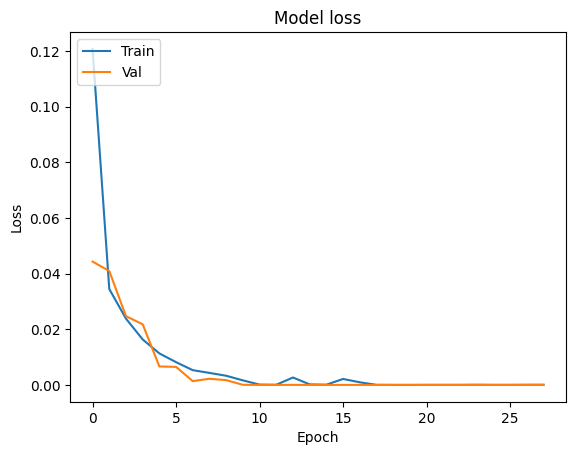

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

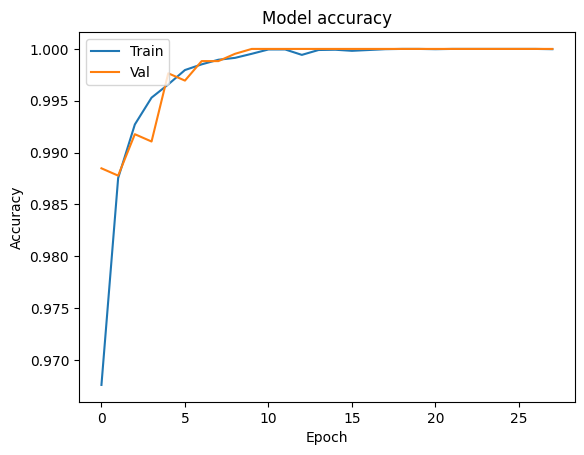

In [25]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()